# 1. Project Description

## 1.1. Business Background

**Despite having a limited client base for loans, a bank is nonetheless a bank with a developing customer base. As a result, the bank wants to increase loan activity, turn depositors into loan users, and increase deposit-loan spreads. In order to do this, the bank's retail credit division began a marketing effort to encourage personal loan business from a select group of consumers. Using data analysis, the department also intended to discover potential clients who handle personal loan business.**

## 1.2. Analyse Problems

**(1) How many of the target market's consumers have engaged in the bank's pertinent business, and how are the clients of different businesses? <br />
(2) What traits do clients who have dealt with the deposit and personal loan company often share?<br />
(3) What factors deposit consumers have that help them become successful personal loan borrowers, as well as the conversion rate of deposit customers to personal loan borrowers? <br />
(4) Based on the customer profile for personal loans, determine how the consumer manages the business.**


## 1.3. Project Instruction

**(1) Data source: The kaggle site is where the data for this project was obtained. This data set displays 5,000 customer records for a bank's loan marketing campaign over the course of a certain year.<br /><br />
(2) Data description: The data dictionary is shown in the following table:<br />
ID: Customer ID<br />
Age: Customer's age in completed years<br />
Experience: Years of professional experience<br />
Income: Annual income of the customer (USD'000)<br />
ZIPCode: Home Address ZIP code.<br />
Family: Family size of the customer<br />
CCAvg: Average spending on credit cards per month (USD'000)<br />
Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional<br />
Mortgage: Value of house mortgage if any. (USD'000)<br />
Personal Loan: Did this customer accept the personal loan offered in the last campaign? O:No 1:Yes<br />
Securities Account: Does the customer have a securities account with the bank? O:No 1:Yes<br />
CD Account: Does the customer have a certificate of deposit (CD) account with the bank? O:No 1:Yes<br />
Online: Does the customer use internet banking facilities? O:No 1:Yes<br />
CreditCard: Does the customer use a credit card issued by UniversalBank? O:No 1:Yes**

#  2. Data Cleaning and Preprocessing

In [392]:
# Import library and preview data

#from google.colab import files

#uploaded = files.upload()



In [393]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt, seaborn as sns
url='Bank_Personal_Loan_Modelling.xlsx'
df=pd.read_excel(url,sheet_name='Data')
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [394]:
# Check the standardization of field names
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [395]:
# View each field type
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [396]:
# View the number of missing values for each field
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**It can be seen that there are no missing values.**

In [397]:
# Delete duplicate records
df.drop_duplicates(inplace=True)
df[df.duplicated()].ID.count()

0

In [398]:
# Remove postcode field-ZIP Code
df.drop('ZIP Code',axis=1,inplace=True)

In [399]:
# Perform descriptive statistics on numeric fields and view outliers
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


**Analysis:<br /><br />
(1) Continuous Features: Age and work experience distributions are rather wide, as indicated by the fact that their means and medians are reasonably near but that their standard deviations are not small; other factors to consider include annual income, the average monthly use of credit cards, and collateral value. The standard deviations of annual income and collateral value are very large, and the degree of right skew is very high. In particular, the median value of the collateral is 0; this shows that more than 50% of customers do not have mortgages on their homes. The mean values of all are higher than the median, indicating that they are all right-skewed distributions with extreme values.<br /><br />
(2) Categorical Features: According to the average value of the five two-category fields, the proportion of sampled customers who have handled credit card business is approximately 29.40%; the proportion of sampled customers who have handled securities business is approximately 10.44%; the proportion of sampled customers who have handled personal loan business is approximately 9.60%; the proportion of sampled customers who have handled deposit business is approximately 6.04%; and the proportion of sampled customers who have used online banking is approximately 59.68%.**


# 3. Overall Analysis of Features

Text(0, 0.5, 'Ratio')

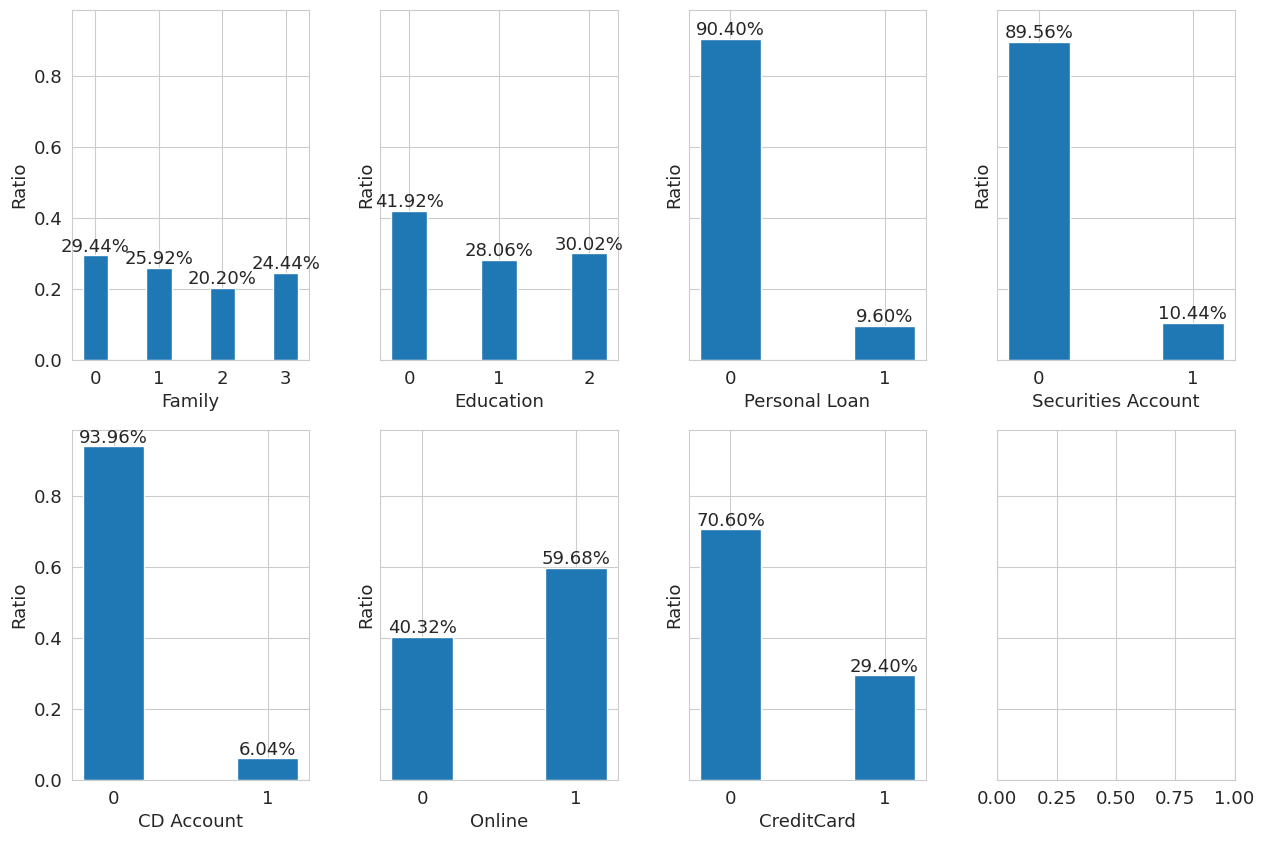

In [400]:
plt.rc('font',size=13)
width=0.4
fig,axes=plt.subplots(2,4,sharey=True,figsize=(15,10))

data=df.groupby('Family').ID.count()
ratiodata=data/df.ID.count()
x=np.arange(len(data))
axes[0,0].set_xticks(x)
axes[0,0].bar(x,ratiodata,width=width)
for a,b in zip(x,ratiodata):
    axes[0,0].text(a,b,'%.2f%%'%(b*100),ha='center',va='bottom')
plt.subplots_adjust(wspace=0.3)
axes[0,0].set_xlabel('Family')
axes[0,0].set_ylabel('Ratio')

data=df.groupby('Education').ID.count()
ratiodata=data/df.ID.count()
x=np.arange(len(data))
axes[0,1].set_xticks(x)
axes[0,1].bar(x,ratiodata,width=width)
for a,b in zip(x,ratiodata):
    axes[0,1].text(a,b,'%.2f%%'%(b*100),ha='center',va='bottom')
plt.subplots_adjust(wspace=0.3)
axes[0,1].set_xlabel('Education')
axes[0,1].set_ylabel('Ratio')

data=df.groupby('Personal Loan').ID.count()
ratiodata=data/df.ID.count()
x=np.arange(len(data))
axes[0,2].set_xticks(x)
axes[0,2].bar(x,ratiodata,width=width)
for a,b in zip(x,ratiodata):
    axes[0,2].text(a,b,'%.2f%%'%(b*100),ha='center',va='bottom')
plt.subplots_adjust(wspace=0.3)
axes[0,2].set_xlabel('Personal Loan')
axes[0,2].set_ylabel('Ratio')

data=df.groupby('Securities Account').ID.count()
ratiodata=data/df.ID.count()
x=np.arange(len(data))
axes[0,3].set_xticks(x)
axes[0,3].bar(x,ratiodata,width=width,)
for a,b in zip(x,ratiodata):
    axes[0,3].text(a,b,'%.2f%%'%(b*100),ha='center',va='bottom')
plt.subplots_adjust(wspace=0.3)
axes[0,3].set_xlabel('Securities Account')
axes[0,3].set_ylabel('Ratio')

data=df.groupby('CD Account').ID.count()
ratiodata=data/df.ID.count()
x=np.arange(len(data))
axes[1,0].set_xticks(x)
axes[1,0].bar(x,ratiodata,width=width,)
for a,b in zip(x,ratiodata):
    axes[1,0].text(a,b,'%.2f%%'%(b*100),ha='center',va='bottom')
plt.subplots_adjust(wspace=0.3)
axes[1,0].set_xlabel('CD Account')
axes[1,0].set_ylabel('Ratio')

data=df.groupby('Online').ID.count()
ratiodata=data/df.ID.count()
x=np.arange(len(data))
axes[1,1].set_xticks(x)
axes[1,1].bar(x,ratiodata,width=width,)
for a,b in zip(x,ratiodata):
    axes[1,1].text(a,b,'%.2f%%'%(b*100),ha='center',va='bottom')
plt.subplots_adjust(wspace=0.3)
axes[1,1].set_xlabel('Online')
axes[1,1].set_ylabel('Ratio')

data=df.groupby('CreditCard').ID.count()
ratiodata=data/df.ID.count()
x=np.arange(len(data))
axes[1,2].set_xticks(x)
axes[1,2].bar(x,ratiodata,width=width,)
for a,b in zip(x,ratiodata):
    axes[1,2].text(a,b,'%.2f%%'%(b*100),ha='center',va='bottom')
plt.subplots_adjust(wspace=0.3)
axes[1,2].set_xlabel('CreditCard')
axes[1,2].set_ylabel('Ratio')
# pltbar(0,0,'Family','')
# pltbar(0,1,'Education','')
# pltbar(0,2,'Personal Loan','')
# pltbar(0,3,'Securities Account','')
# pltbar(1,0,'CD Account','')
# pltbar(1,1,'Online','')
# pltbar(1,2,'CreditCard','')

**Analysis:<br /><br />
(1) Family Size: The family size is one person, meaning that single customers are most prevalent; the next highest family size in terms of customers is two people, followed by four people, and then three people, in that order. Nevertheless, the customer counts for the four family sizes vary from one another. Between 20% and 30% of the overall number of consumers are small, and they are dispersed rather equally.<br /><br />
(2) Educational Level: The majority of clients have a bachelor's degree or less, although customers with a bachelor's degree or above made up more than half of the total. It is clear that the majority of the bank's clients are people with college degrees.<br /><br />
(3) Response Behavior: Customers who have not handled personal loans, stocks, deposits, or credit card transactions outnumber those who have by a large margin. It is clear that just a tiny portion of the target population for this marketing effort has interacted with the pertinent bank business.**

# 4. Deposit and Loan Business Customer Portrait

## 4.1. Deposit Customer Portrait

In [401]:
acc = df[df['CD Account'] == 1]

In [402]:
acc['Age']

29      38
38      42
47      37
56      55
75      31
        ..
4927    43
4937    33
4942    52
4962    46
4980    29
Name: Age, Length: 302, dtype: int64

/var/folders/4v/22twjysx675gmb76rrtgn1w80000gn/T/ipykernel_86265/1168179881.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(acc['Age'],rug=True)


Text(0.5, 1.0, 'Age Distribution of Deposit Customers')

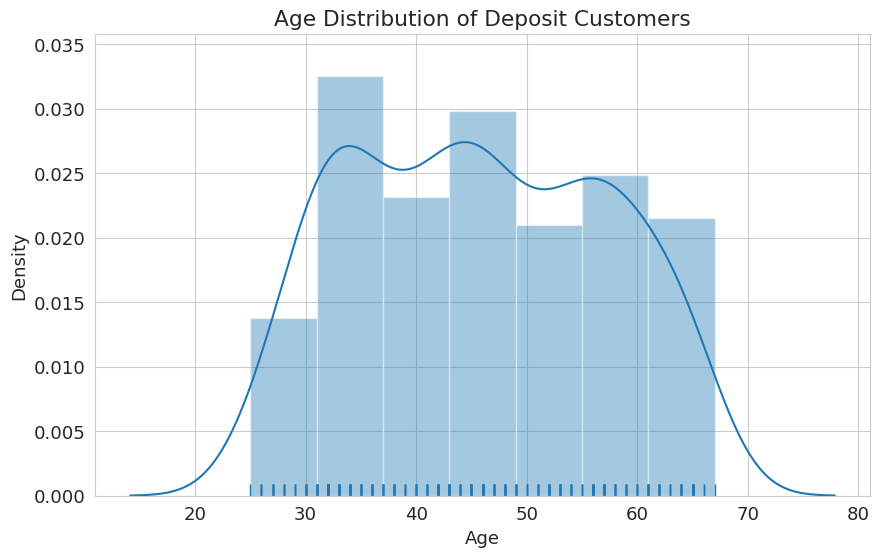

In [403]:
sns.distplot(acc['Age'],rug=True)
plt.title('Age Distribution of Deposit Customers')

In [404]:
no_acc= df[df['CD Account'] == 0]

/var/folders/4v/22twjysx675gmb76rrtgn1w80000gn/T/ipykernel_86265/2420978861.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(no_acc['Age'],rug=True)


Text(0.5, 1.0, 'Age Distribution of Non-Deposit Customers')

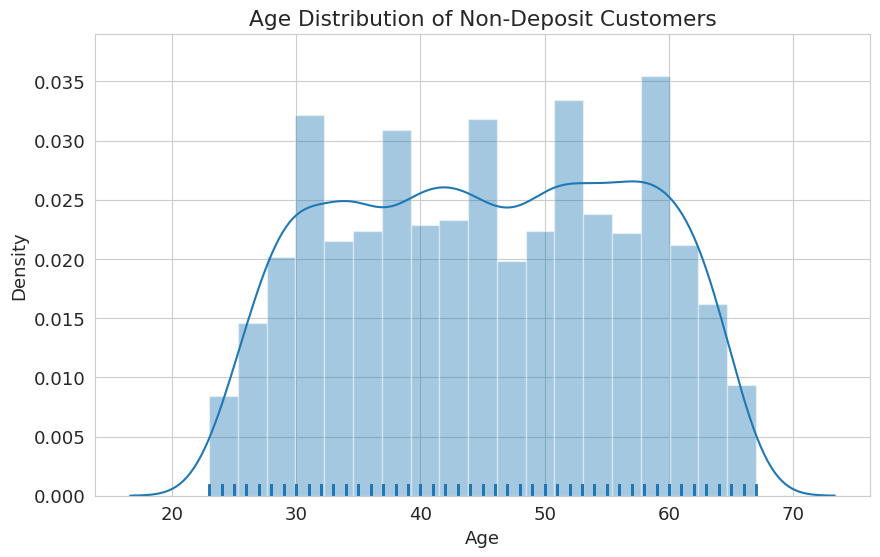

In [405]:
sns.distplot(no_acc['Age'],rug=True)
plt.title('Age Distribution of Non-Deposit Customers')

/var/folders/4v/22twjysx675gmb76rrtgn1w80000gn/T/ipykernel_86265/3288040341.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(acc['Income'],rug=True)


Text(0.5, 1.0, 'Income Distribution of Deposit Customers')

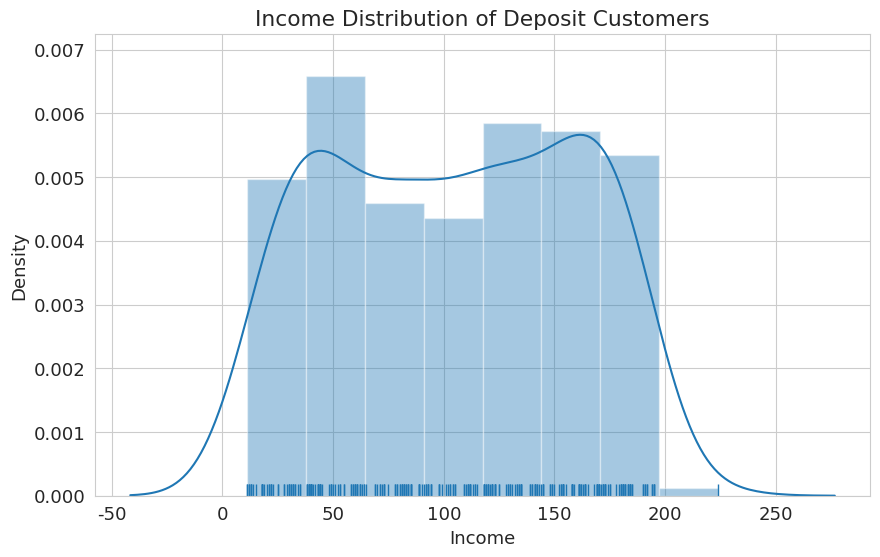

In [406]:
sns.distplot(acc['Income'],rug=True)
plt.title('Income Distribution of Deposit Customers')

In [407]:
no_acc= df[df['CD Account'] == 0]

/var/folders/4v/22twjysx675gmb76rrtgn1w80000gn/T/ipykernel_86265/1501949923.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(no_acc['Income'],rug=True)


Text(0.5, 1.0, 'Income Distribution of Non-Deposit Customers')

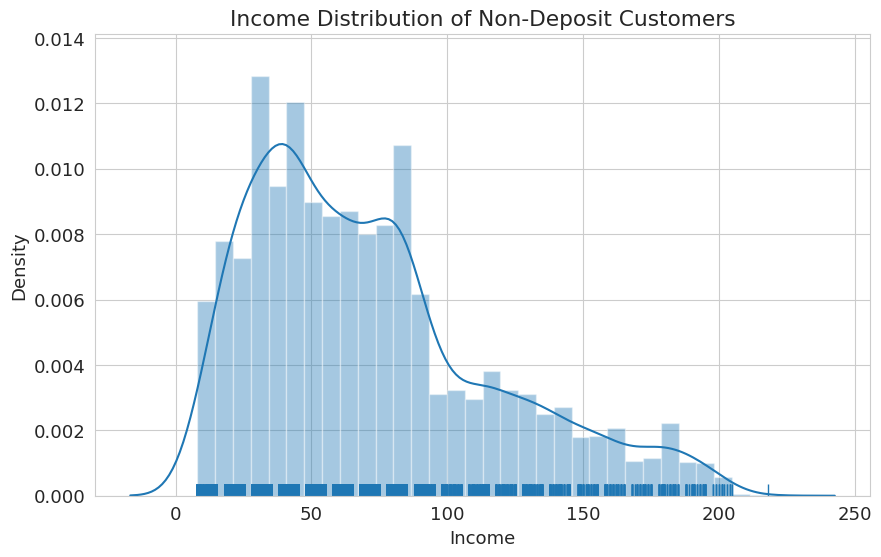

In [408]:
sns.distplot(no_acc['Income'],rug=True)
plt.title('Income Distribution of Non-Deposit Customers')

/var/folders/4v/22twjysx675gmb76rrtgn1w80000gn/T/ipykernel_86265/2952056858.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(acc['CCAvg'],rug=True)


Text(0.5, 1.0, 'Distribution of Credit Card Spending by Deposit Customers')

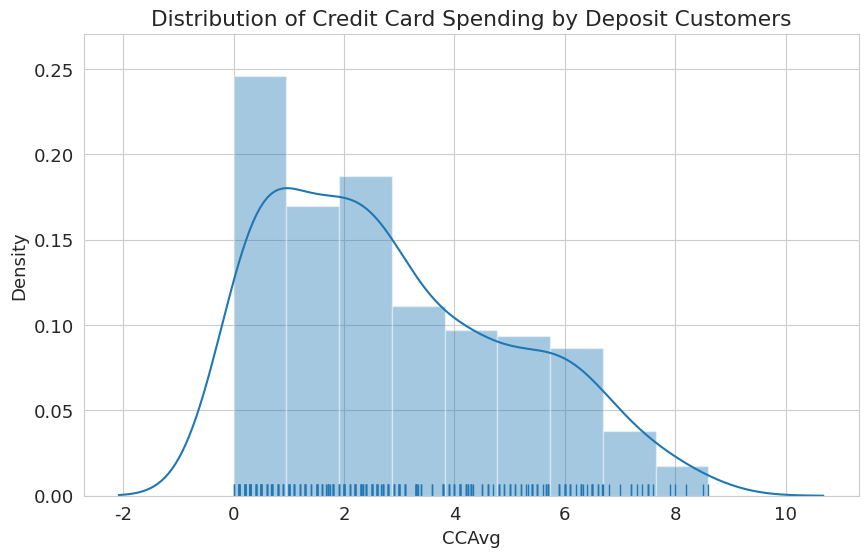

In [409]:
sns.distplot(acc['CCAvg'],rug=True)
plt.title('Distribution of Credit Card Spending by Deposit Customers')

/var/folders/4v/22twjysx675gmb76rrtgn1w80000gn/T/ipykernel_86265/3450503269.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(no_acc['CCAvg'],rug=True)


Text(0.5, 1.0, 'Distribution of Credit Card Spending by Non-Deposit Customers')

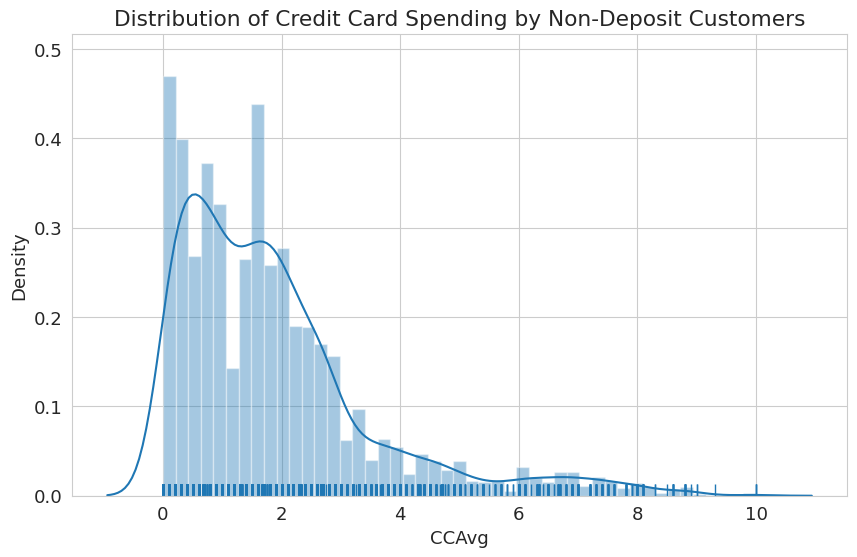

In [410]:
sns.distplot(no_acc['CCAvg'],rug=True)
plt.title('Distribution of Credit Card Spending by Non-Deposit Customers')

**Analysis:<br /><br />
(1) In terms of age distribution: Deposit clients are mostly between the ages of 33 and 55. Customers between the ages of 33 and 45 make up the majority of their clientele. Deposit clients tend to be youthful and middle-aged, as can be shown.<br /><br />
(2) In terms of annual income distribution: The distribution of annual income of non-deposit customers is to the right, but the overall concentration is around 40,000 US dollars, indicating that non-deposit customers are primarily low- to middle-income; in contrast, the distribution of annual income of deposit customers is fairly broad and even. Focus on amounts between 40,000 and 160,000 US dollars.<br /><br />
(3) In terms of distribution of average monthly credit card spending: The average monthly credit card consumption of depositors and non-deposit customers is centered at around 1,000 US dollars, indicating that the total level of credit card consumption of the two groups of clients is not large. There are consumers who consume a lot, and the distribution is right-skewed.**

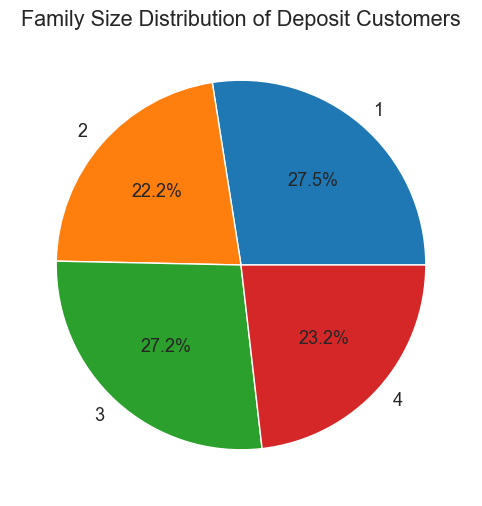

In [411]:
sns.set_style("whitegrid")
data = [len(acc[acc['Family'] == 1]), len(acc[acc['Family'] == 2]),len(acc[acc['Family'] == 3]),len(acc[acc['Family'] == 4])]
plt.pie(data,  labels=['1','2','3','4'],  autopct='%1.1f%%')
plt.title('Family Size Distribution of Deposit Customers')

plt.show()


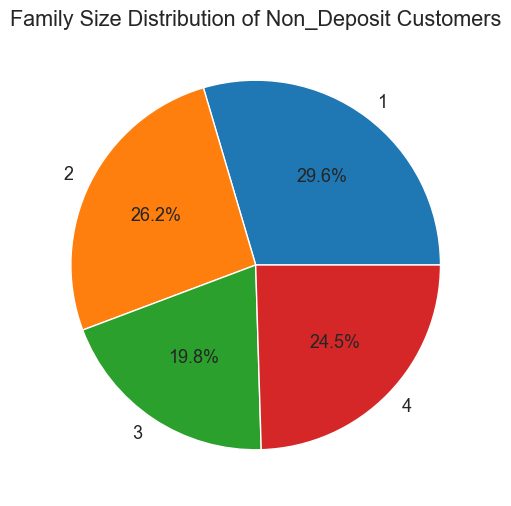

In [412]:
sns.set_style("whitegrid")
data = [len(no_acc[no_acc['Family'] == 1]), len(no_acc[no_acc['Family'] == 2]),len(no_acc[no_acc['Family'] == 3]),len(no_acc[no_acc['Family'] == 4])]
plt.pie(data,  labels=['1','2','3','4'],  autopct='%1.1f%%')
plt.title('Family Size Distribution of Non_Deposit Customers')

plt.show()

**The family size is 1 person, that is, customers who are single or divorced account for the largest proportion of depositors and non-depositors; but among depositors, the family size is 3 and 4 people, that is, married with children The proportion of customers is higher than that of customers with a family size of 2, that is, customers who are married but have no children.**

## 4.2. Personal Loan Customer Portrait

In [413]:
pl = df[df['Personal Loan'] == 1]
no_pl = df[df['Personal Loan'] == 0]

/var/folders/4v/22twjysx675gmb76rrtgn1w80000gn/T/ipykernel_86265/2822140980.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pl['Age'],rug=True)


Text(0.5, 1.0, 'Age Distribution of Personal Loan Customers')

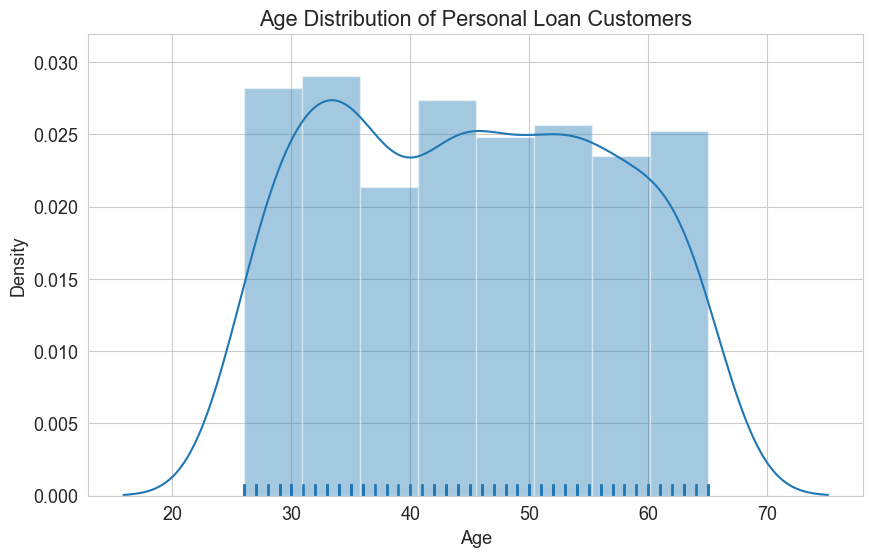

In [414]:
sns.distplot(pl['Age'],rug=True)
plt.title('Age Distribution of Personal Loan Customers')

/var/folders/4v/22twjysx675gmb76rrtgn1w80000gn/T/ipykernel_86265/1744481924.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(no_pl['Age'],rug=True)


Text(0.5, 1.0, 'Age Distribution of Non-Personal Loan Customers')

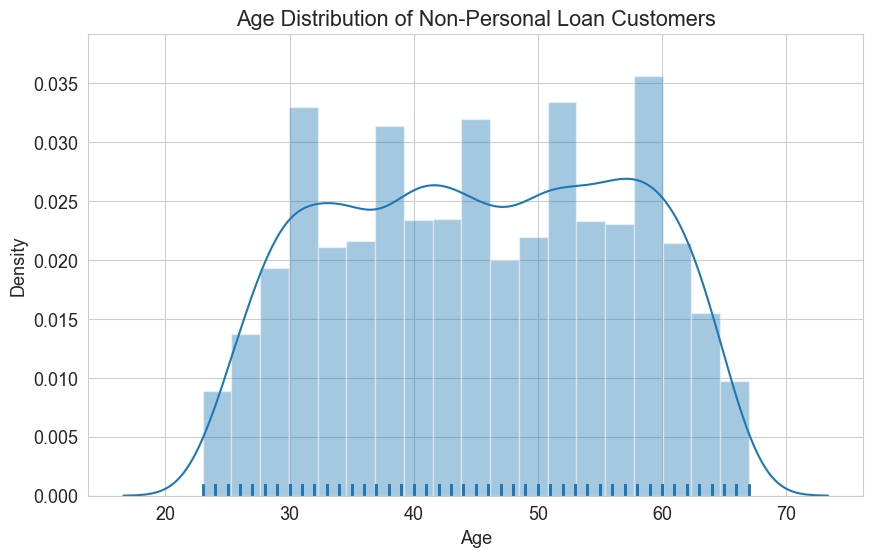

In [415]:
sns.distplot(no_pl['Age'],rug=True)
plt.title('Age Distribution of Non-Personal Loan Customers')

/var/folders/4v/22twjysx675gmb76rrtgn1w80000gn/T/ipykernel_86265/798709743.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pl['Income'],rug=True)


Text(0.5, 1.0, 'Income Distribution of Personal Loan Customers')

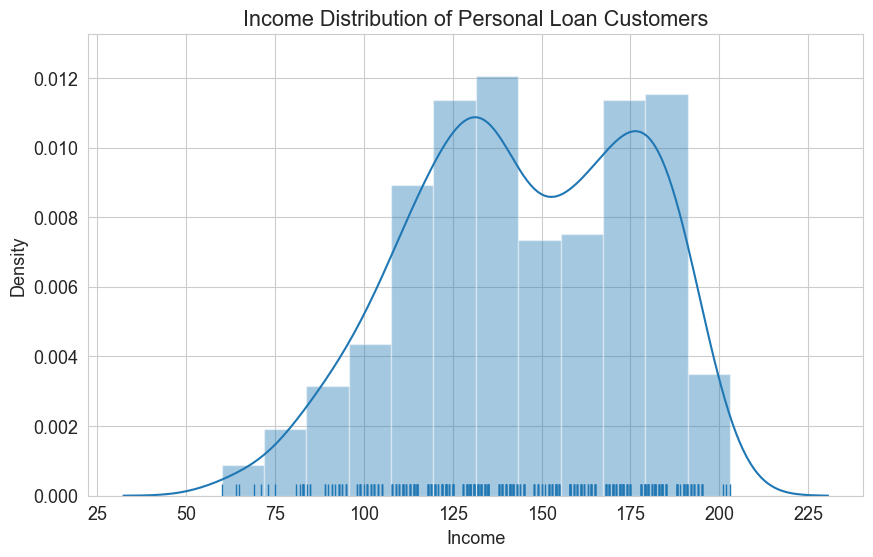

In [416]:
sns.distplot(pl['Income'],rug=True)
plt.title('Income Distribution of Personal Loan Customers')

/var/folders/4v/22twjysx675gmb76rrtgn1w80000gn/T/ipykernel_86265/3583324812.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(no_pl['Income'],rug=True)


Text(0.5, 1.0, 'Income Distribution of Non-Personal Loan Customers')

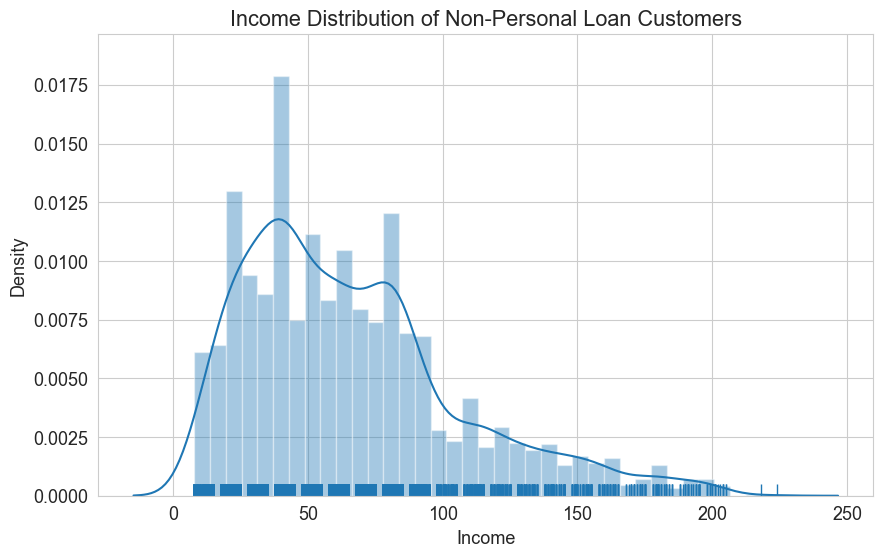

In [417]:
sns.distplot(no_pl['Income'],rug=True)
plt.title('Income Distribution of Non-Personal Loan Customers')

/var/folders/4v/22twjysx675gmb76rrtgn1w80000gn/T/ipykernel_86265/808964202.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pl['CCAvg'],rug=True)


Text(0.5, 1.0, 'Credit Card Consumption Distribution of Personal Loan Customers')

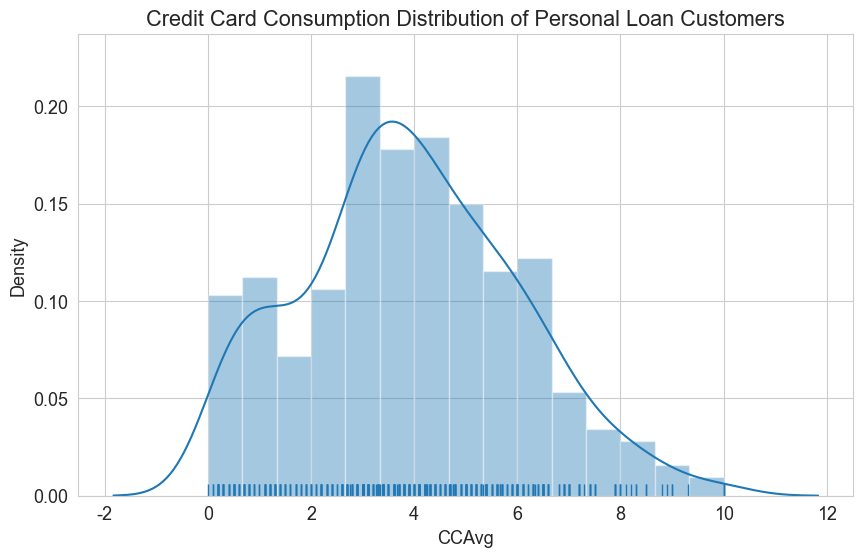

In [418]:
sns.distplot(pl['CCAvg'],rug=True)
plt.title('Credit Card Consumption Distribution of Personal Loan Customers')

/var/folders/4v/22twjysx675gmb76rrtgn1w80000gn/T/ipykernel_86265/3610997461.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(no_pl['CCAvg'],rug=True)


Text(0.5, 1.0, 'Credit Card Consumption Distribution of Non-Personal Loan Customers')

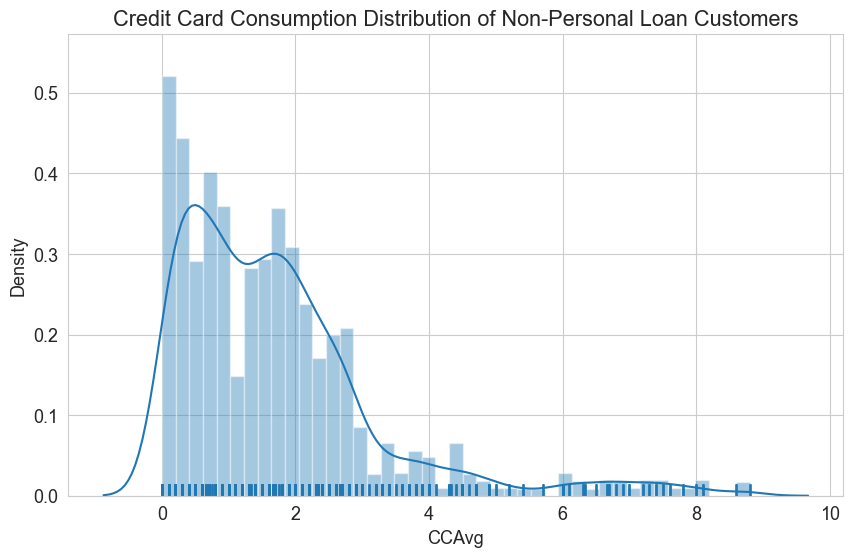

In [419]:
sns.distplot(no_pl['CCAvg'],rug=True)
plt.title('Credit Card Consumption Distribution of Non-Personal Loan Customers')

**Analysis:<br /><br />
(1) In terms of age distribution: The majority of personal loan borrowers are between the ages of 32 and 50; those between the ages of 32 and 38 and those between the ages of 40 and 50 have higher loan balances than those in other age brackets. Nearby clients of similar ages are less prevalent.<br /><br />
(2) In terms of annual income distribution: While the annual income of personal loan customers is relatively evenly distributed, concentrated between 130,000 US dollars and 175,000 US dollars, primarily middle-to-high income; at the same time, on the right side of 98,000 US dollars, the kernel density curve of personal loan customers is rising sharply, indicating that the majority of these customers have annual incomes between 40,000 and 80,000 US dollars. It is clear that the cutoff limit is an annual income of 98,000 USD, and consumers whose income exceeds that amount are more likely to obtain personal loans.<br /><br />
(3) In terms of monthly average credit card consumption: The distribution of average monthly credit card consumption is relatively even, and it is concentrated at about 3.5 thousand US dollars, mainly in the middle and high consumption levels. The average monthly credit card consumption of non-personal loan customers is distributed to the right, but it is concentrated between 0.5 and 1.7 thousand US dollars, and the consumption level is generally low. The kernel density curve of customers who take out personal loans simultaneously climbs significantly and soon achieves its top on the right side of USD 2.8 thousand, whereas the kernel density curve of customers who take out non-personal loans drastically falls. As can be observed, a cutoff value of USD 2.8 thousand and the typical monthly credit card usage More likely to do personal loan business are customers with an amount above this threshold.**


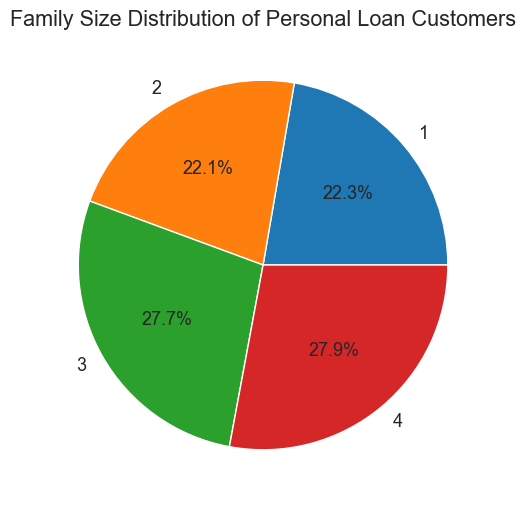

In [420]:
sns.set_style("whitegrid")
data = [len(pl[pl['Family'] == 1]), len(pl[pl['Family'] == 2]),len(pl[pl['Family'] == 3]),len(pl[pl['Family'] == 4])]
plt.pie(data,  labels=['1','2','3','4'],  autopct='%1.1f%%')
plt.title('Family Size Distribution of Personal Loan Customers')

plt.show()

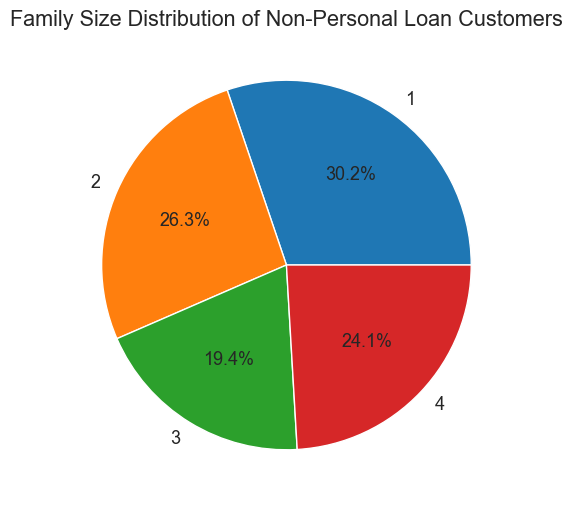

In [421]:
sns.set_style("whitegrid")
data = [len(no_pl[no_pl['Family'] == 1]), len(no_pl[no_pl['Family'] == 2]),len(no_pl[no_pl['Family'] == 3]),len(no_pl[no_pl['Family'] == 4])]
plt.pie(data,  labels=['1','2','3','4'],  autopct='%1.1f%%')
plt.title('Family Size Distribution of Non-Personal Loan Customers')


plt.show()

**Non-personal loan customers are mainly single or married without children, while personal loan customers are mainly married with children.**

# 5. Correlation Analysis

In [422]:
acc = df[df['CD Account'] == 1]
print(acc)



        ID  Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
29      30   38          13     119       1    3.3          2         0   
38      39   42          18     141       3    5.0          3         0   
47      48   37          12     194       4    0.2          3       211   
56      57   55          30      29       3    0.1          2         0   
75      76   31           7     135       4    3.8          2         0   
...    ...  ...         ...     ...     ...    ...        ...       ...   
4927  4928   43          19     121       1    0.7          2         0   
4937  4938   33           8     162       1    8.6          1         0   
4942  4943   52          26     109       1    2.4          1       308   
4962  4963   46          20     122       3    3.0          3         0   
4980  4981   29           5     135       3    5.3          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
29                1      

In [423]:
number_CD_Account = len(acc)

gedai = acc['Personal Loan']

gedai_in_CDAccount = [x for x in gedai if x == 1]

print('The percent of Personal Loan customers in CD Account customers: {:.2%}'.format(len(gedai_in_CDAccount)/number_CD_Account))



online=acc['Online']
online_in_CDAccount =[x for x in online if x == 1]
print('The percent of Online customers in CD Account customers: {:.2%}'.format(len(online_in_CDAccount)/number_CD_Account))

credit_card=acc['CreditCard']
creditcard_in_CDAccount=[x for x in credit_card if x == 1]
print('The percent of CreditCard customers in CD Account customers: {:.2%}'.format(len(creditcard_in_CDAccount)/number_CD_Account))



The percent of Personal Loan customers in CD Account customers: 46.36%
The percent of Online customers in CD Account customers: 93.71%
The percent of CreditCard customers in CD Account customers: 79.47%


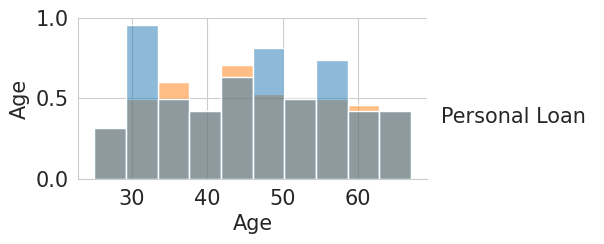

In [424]:
#Differences between the customers:CD Account and Personal Loan, CD Account but not Personal loan

plt.rcParams['font.sans-serif'] =['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font',size=15)
sns.pairplot(acc.loc[:,['Personal Loan','Age']],
             vars=['Age'],hue='Personal Loan',diag_kind='hist',aspect=1.8)

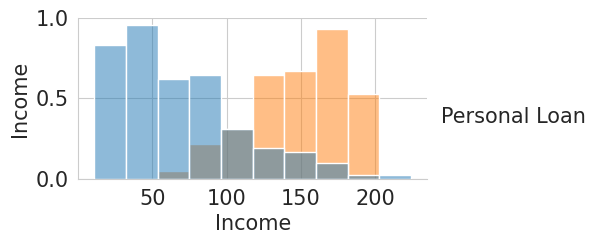

In [425]:
sns.pairplot(acc.loc[:,['Personal Loan','Income']],
             vars=['Income'],hue='Personal Loan',diag_kind='hist',aspect=1.8)

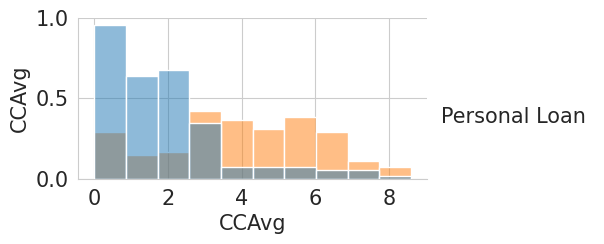

In [426]:
sns.pairplot(acc.loc[:,['Personal Loan','CCAvg']],
             vars=['CCAvg'],hue='Personal Loan',diag_kind='hist',aspect=1.8)

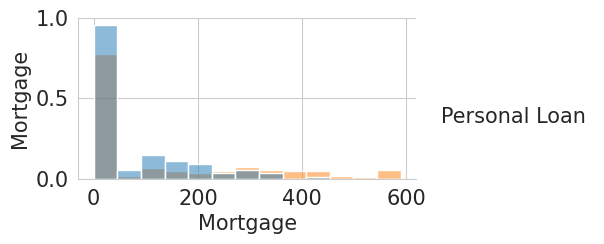

In [427]:
sns.pairplot(acc.loc[:,['Personal Loan','Mortgage']],
             vars=['Mortgage'],hue='Personal Loan',diag_kind='hist',aspect=1.8)

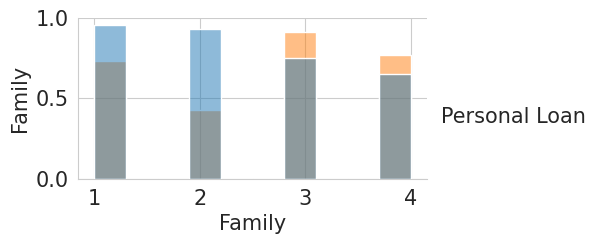

In [428]:
sns.pairplot(acc.loc[:,['Personal Loan','Family']],
             vars=['Family'],hue='Personal Loan',diag_kind='hist',aspect=1.8)

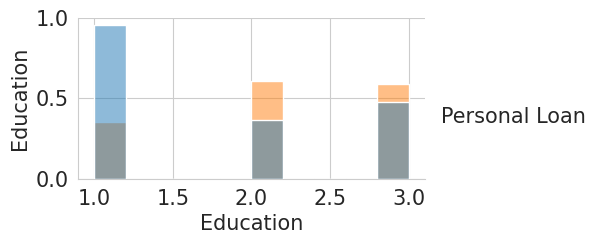

In [429]:
sns.pairplot(acc.loc[:,['Personal Loan','Education']],
             vars=['Education'],hue='Personal Loan',diag_kind='hist',aspect=1.8)

# 6. Modelling

## 6.1 model building

In [430]:
df

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,3,0.5,2,0,0,0,0,1,0


In [431]:
df.drop('ID',axis=1,inplace=True)

In [432]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [433]:
# find negative values in Experience columns, show the rows
df[df['Experience'] < 0]
# convert negativa value to positive value
df[df['Experience'] < 0] = df[df['Experience'] < 0].abs()
# check again
pd.set_option('display.max_rows', 20) 
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.34,11.46,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.13,11.42,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.77,46.03,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.40,1.15,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.94,1.75,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.88,0.84,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.50,101.71,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.10,0.29,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.10,0.31,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.06,0.24,0.0,0.0,0.0,0.0,1.0


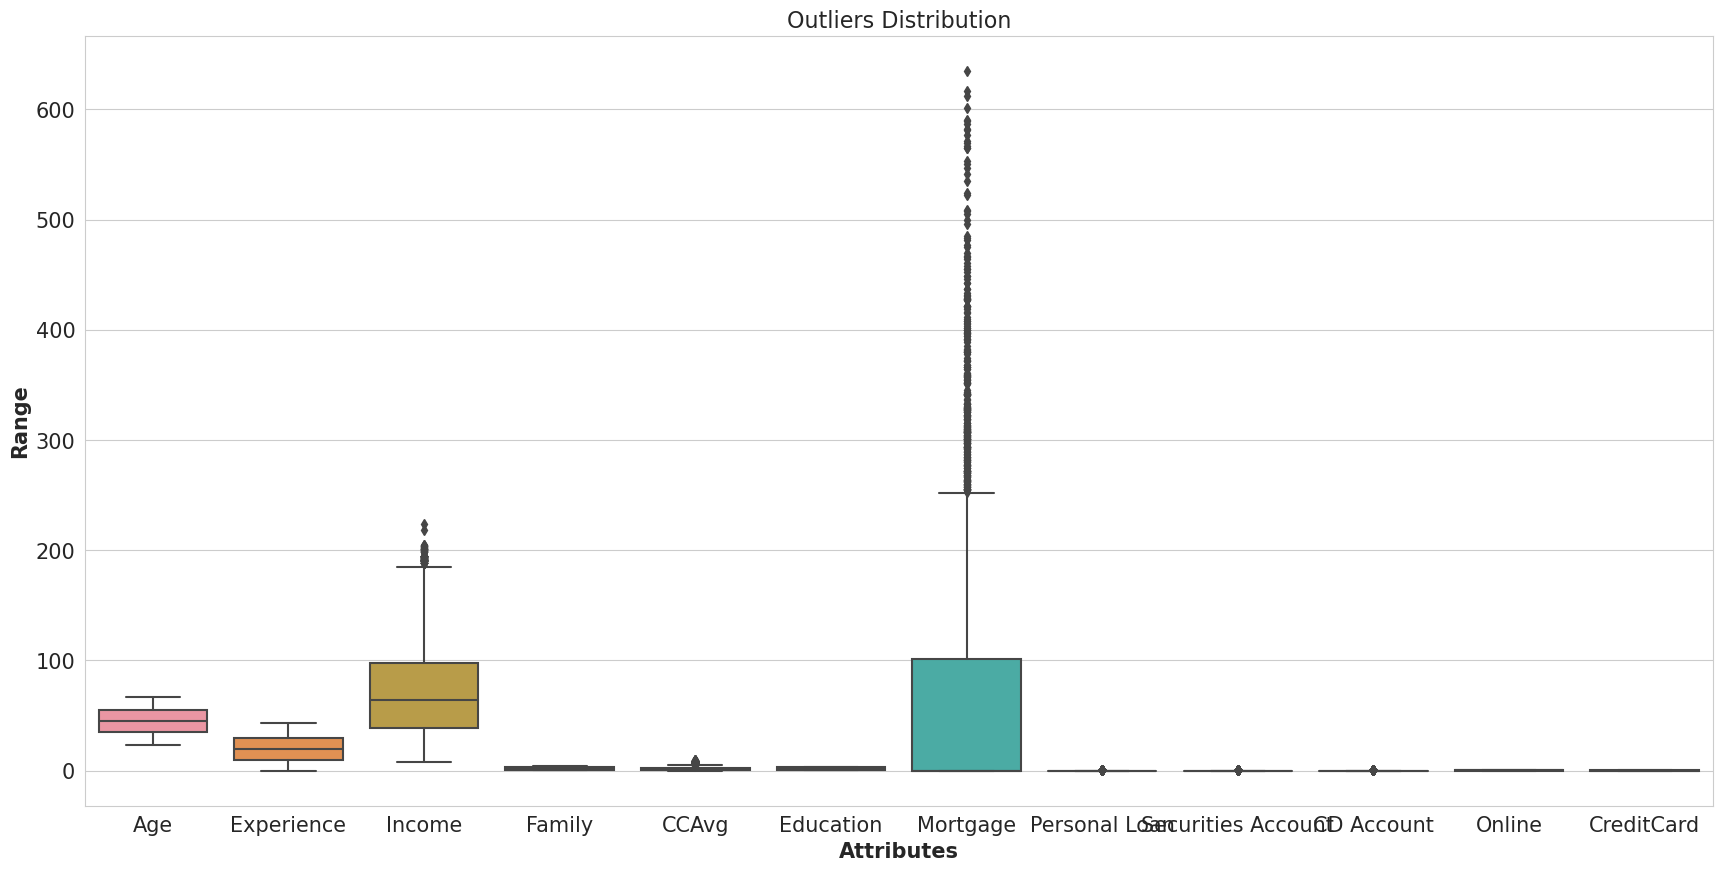

In [434]:
# check the outlier:using boxplot
def show_boxplot(df):
  plt.rcParams['figure.figsize'] = [21,10]
  sns.boxplot(data = df, orient="v")
  plt.title("Outliers Distribution", fontsize = 16)
  plt.ylabel("Range", fontweight = 'bold')
  plt.xlabel("Attributes", fontweight = 'bold')
    
show_boxplot(df)

In [435]:
from sklearn import preprocessing as prep
df['Income_std']=prep.StandardScaler().fit_transform(np.log1p(df['Income']).values.reshape(-1,1)) 
df['CCAvg_std']=prep.StandardScaler().fit_transform(np.log1p(df['CCAvg']).values.reshape(-1,1))
df['Mortgage_std']=prep.StandardScaler().fit_transform(df['Mortgage'].values.reshape(-1,1)) 


In [436]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income_std,CCAvg_std,Mortgage_std
0,25,1,49,4,1.6,1,0,0,1,0,0,0,-0.286700,0.049072,-0.555524
1,45,19,34,3,1.5,1,0,0,1,0,0,0,-0.811294,-0.024482,-0.555524
2,39,15,11,1,1.0,1,0,0,0,0,0,0,-2.385689,-0.442962,-0.555524
3,35,9,100,1,2.7,2,0,0,0,0,0,0,0.747409,0.710747,-0.555524
4,35,8,45,4,1.0,2,0,0,0,0,0,1,-0.409337,-0.442962,-0.555524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0,-0.578579,0.253862,-0.555524
4996,30,4,15,4,0.4,1,85,0,0,0,1,0,-1.962569,-1.111864,0.280238
4997,63,39,24,2,0.3,3,0,0,0,0,0,0,-1.306174,-1.250845,-0.555524
4998,65,40,49,3,0.5,2,0,0,0,0,1,0,-0.286700,-0.982476,-0.555524


perform outlier treatment: z-score method

In [437]:
from scipy import stats
print(df[stats.zscore(df['Mortgage_std'])>3]['Mortgage_std'].count())
print(df[stats.zscore(df['Income_std'])>3]['Income_std'].count())
print(df[stats.zscore(df['CCAvg_std'])>3]['CCAvg_std'].count())

105
0
0


In [438]:
# remove rows with outliers
outliers = df[stats.zscore(df['Mortgage_std'])>3].index
df.drop(outliers, inplace=True)
df.reset_index(drop=True, inplace=True)

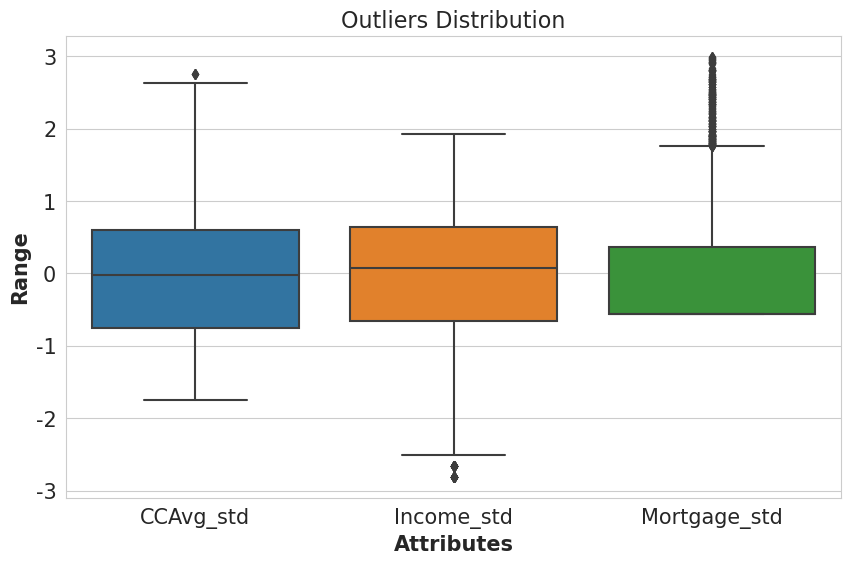

In [439]:
# check again
# check the outlier:using boxplot
def show_boxplot(df):
  plt.rcParams['figure.figsize'] = [10,6]
  sns.boxplot(data = df[['CCAvg_std','Income_std','Mortgage_std']], orient="v")
  plt.title("Outliers Distribution", fontsize = 16)
  plt.ylabel("Range", fontweight = 'bold')
  plt.xlabel("Attributes", fontweight = 'bold')
    
show_boxplot(df)

In [440]:
# define x and y
x = df.drop(['Personal Loan','Income','CCAvg','Mortgage'] ,axis=1)
y = df['Personal Loan'].values.reshape(-1,1)
print(x)
print(y)

      Age  Experience  Family  Education  Securities Account  CD Account  \
0      25           1       4          1                   1           0   
1      45          19       3          1                   1           0   
2      39          15       1          1                   0           0   
3      35           9       1          2                   0           0   
4      35           8       4          2                   0           0   
...   ...         ...     ...        ...                 ...         ...   
4890   29           3       1          3                   0           0   
4891   30           4       4          1                   0           0   
4892   63          39       2          3                   0           0   
4893   65          40       3          2                   0           0   
4894   28           4       3          1                   0           0   

      Online  CreditCard  Income_std  CCAvg_std  Mortgage_std  
0          0           

In [441]:
# split train and test data by inital test_size=0.2
# stratify used for considering class distribution in spliting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print('Number of training samples:',x_train.shape[0])
print('Number of testing samples:',x_test.shape[0])
print(f'{(y_train==1).sum()} positive training label, {(y_train==0).sum()} negative training label')

Number of training samples: 3916
Number of testing samples: 979
346 positive training label, 3570 negative training label


from the training label we can see that the data is imbalance, we can use oversampling to figure out the problem.

In [442]:
from imblearn.over_sampling import SMOTE
x_train,y_train = SMOTE(random_state=1).fit_resample(x_train,y_train.ravel()) 
print('Training samples after SMOTE:',x_train.shape[0])
print('Positive training samples after SMOTE:',(y_train==1).sum())
print('Negative Training samples after SMOTE:',(y_train==0).sum()) 

Training samples after SMOTE: 7140
Positive training samples after SMOTE: 3570
Negative Training samples after SMOTE: 3570


now the dataset is balanced

## 6.2 Decision Tree

In [443]:
# decision tree[original]
# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,1,20)]
    
# Define the hyperparameter grid
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': np.arange(1, 10),
              'min_samples_split': np.arange(1, 10),
              'min_samples_leaf': np.arange(1, 10),
              'max_features': [None, 'sqrt', 'log2'],
              'class_weight': class_weights} 

In [444]:
# Create a  Decision Tree Classifier object
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier(random_state=0)
#  Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
# y_train_predicted=clf.predict(x_train)
y_test_predicted=clf.predict(x_test)

In [445]:
from sklearn import metrics 
print(metrics.classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       892
           1       0.79      0.93      0.85        87

    accuracy                           0.97       979
   macro avg       0.89      0.95      0.92       979
weighted avg       0.97      0.97      0.97       979



In [446]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics 
print("Test Accuracy:", metrics.accuracy_score(y_test,y_test_predicted))
print("Test Recall:", metrics.recall_score(y_test,y_test_predicted))
print("Test f1_score:", metrics.f1_score(y_test,y_test_predicted))
print("Test precision:", metrics.precision_score(y_test,y_test_predicted))

Test Accuracy: 0.9713993871297242
Test Recall: 0.9310344827586207
Test f1_score: 0.8526315789473684
Test precision: 0.7864077669902912


Index(['Age', 'Experience', 'Family', 'Education', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'Income_std', 'CCAvg_std',
       'Mortgage_std'],
      dtype='object')


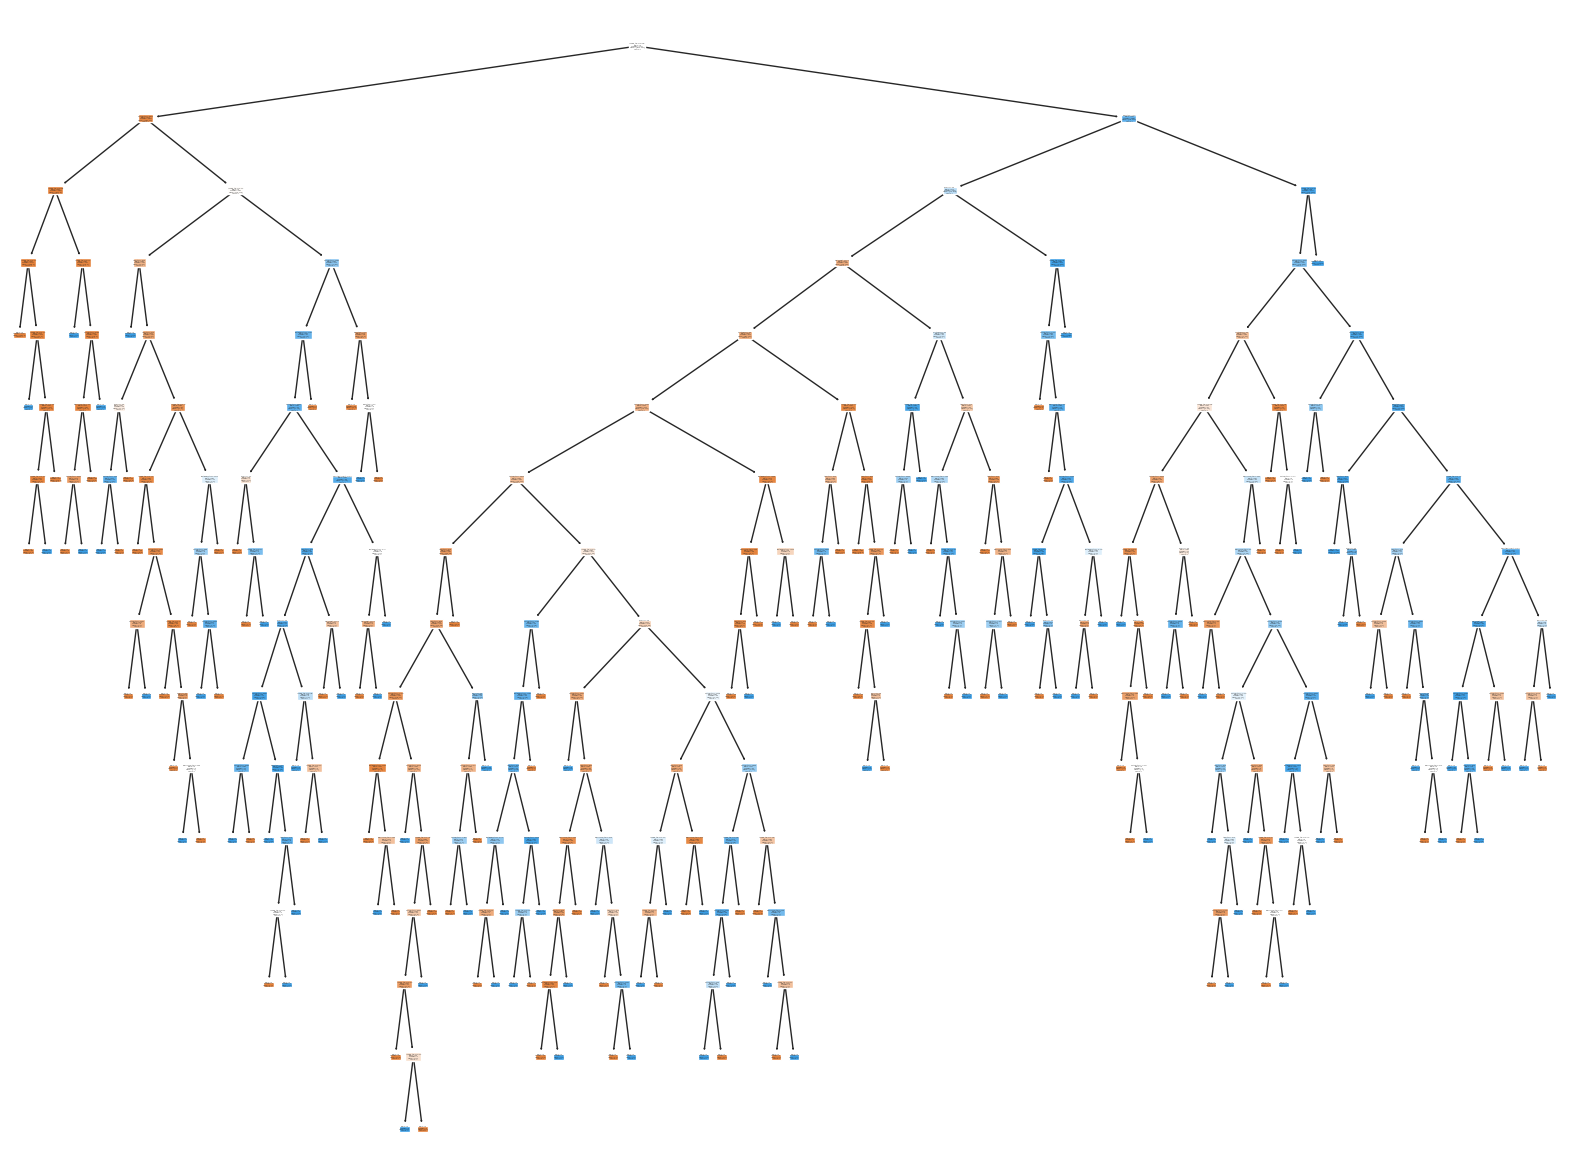

In [447]:
# visualizing tree
from sklearn import tree
print(x.columns)
feature_names = ['Age_std', 'Experience_std', 'Family', 'Education', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'Income_std', 'CCAvg_std',
       'Mortgage_std']
target_names = ['0', '1']
fig = plt.figure(figsize=(20,15))
dt1 = DecisionTreeClassifier(random_state=0)
dt1.fit(x_train,y_train.ravel())
plot = tree.plot_tree(
    dt1,
    feature_names = feature_names,
    class_names = target_names,
    filled=True)
plt.show()

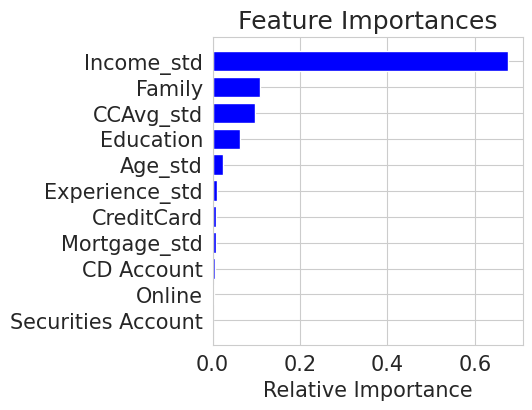

In [448]:
# show the importance of each indice
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(4,4))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Optimizing Decision Tree Performance

In [449]:
# Create Decision Tree classifer object
from sklearn.tree import DecisionTreeClassifier 
clf_revised = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clf_revised = clf_revised.fit(x_train,y_train)

y_test_predicted_re=clf_revised.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:", metrics.accuracy_score(y_test,y_test_predicted_re))
print("Test Recall:", metrics.recall_score(y_test,y_test_predicted_re))
from sklearn import metrics 
print(metrics.classification_report(y_test,y_test_predicted_re))

Test Accuracy: 0.9775280898876404
Test Recall: 0.9425287356321839
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       892
           1       0.83      0.94      0.88        87

    accuracy                           0.98       979
   macro avg       0.91      0.96      0.93       979
weighted avg       0.98      0.98      0.98       979



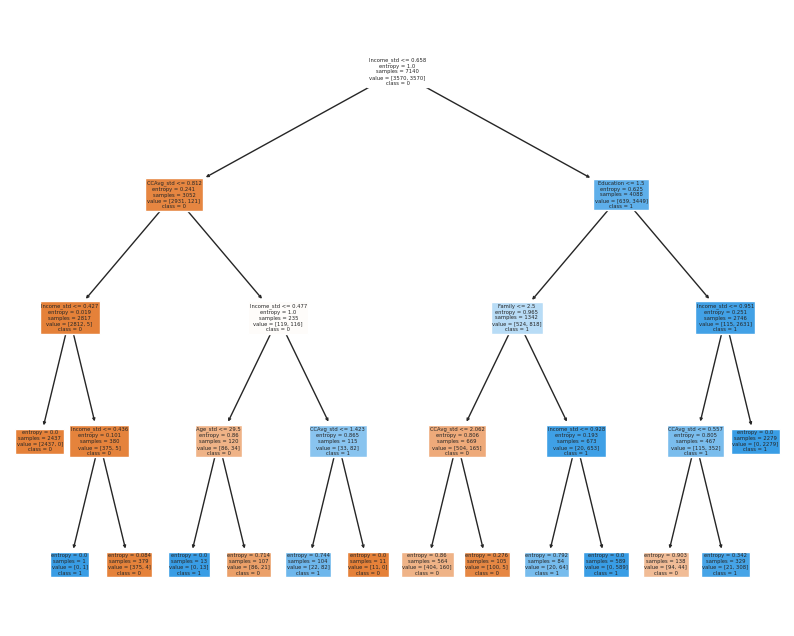

In [450]:
fig = plt.figure(figsize=(10,8))
plot = tree.plot_tree(
    clf_revised,
    feature_names = feature_names,
    class_names = target_names,
    filled=True)
plt.show()

## 6.3 Random Forest

In [451]:
random_state = 42
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,roc_curve,auc,roc_auc_score

In [452]:
from sklearn.ensemble import RandomForestClassifier as RFC
params = {"max_samples": range(1000, x_train.shape[0]*4//5, 500)}
grid = GridSearchCV(RFC(random_state = random_state, max_depth=3, criterion="entropy"), params, cv=5, scoring='f1')
grid.fit(x_train, y_train)
print(f"Best HyperParameters: {grid.best_params_}")
print(f"Best Accuracy: {grid.best_score_}")

Best HyperParameters: {'max_samples': 4000}
Best Accuracy: 0.9250713175238925


In [453]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

train_sizes,train_scores,test_scores,fit_times,_=learning_curve( RFC(random_state = random_state, max_depth=3, criterion="entropy"),
                                                                x_train,y_train,return_times=True,
                                                                cv=ShuffleSplit(n_splits=100,test_size=0.2,random_state=random_state) )

train_scores_mean=np.mean(train_scores,axis=1)
test_scores_mean=np.mean(test_scores,axis=1)

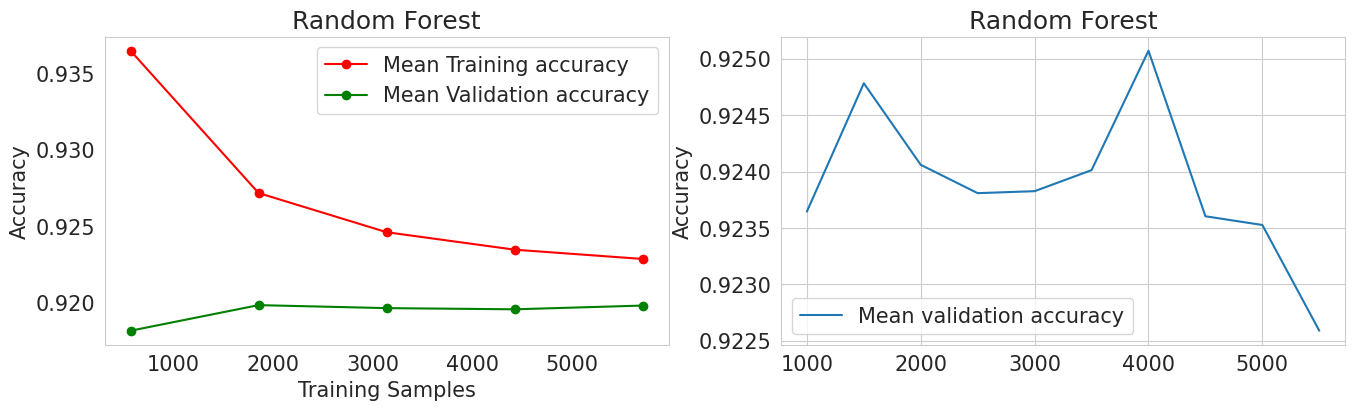

In [454]:
fig,axes=plt.subplots(1,2,figsize=(16,4))
axes[0].set_title("Random Forest")
axes[0].set_xlabel("Training Samples")
axes[0].set_ylabel("Accuracy")
axes[0].plot(train_sizes,train_scores_mean,'o-',color='r',label="Mean Training accuracy")
axes[0].plot(train_sizes,test_scores_mean,'o-',color='g',label="Mean Validation accuracy")
axes[0].legend(loc='best')
axes[0].grid()

temp = pd.DataFrame(grid.cv_results_)
cv_results = temp.pivot_table(values='mean_test_score',index=temp.columns[4])
axes[1].set_title("Random Forest")
axes[1].set_ylabel("Accuracy")
#cv_results.plot(ax=axes[1],marker='o',label="Mean validation accuracy")
axes[1].plot(cv_results, label="Mean validation accuracy")
axes[1].legend(loc='best')

No drop off in Mean validation accuracy seen as training samples increase, so the final model will be fitted with all the training samples and the max_samples parameter set to 4000


In [455]:
from sklearn import metrics
final_model = grid.best_estimator_
final_model.fit(x_train, y_train)
pred_label=final_model.predict(x_test) 
pred_proba=final_model.predict_proba(x_test)[:,1] 
print(metrics.classification_report(y_test,pred_label))
print("AUC: ", round(roc_auc_score(y_test, pred_proba),4))

print("Test Accuracy:", metrics.accuracy_score(y_test,pred_label))
print("Test Recall:", metrics.recall_score(y_test,pred_label))
print("Test f1_score:", metrics.f1_score(y_test,pred_label))
print("Test precision:", metrics.precision_score(y_test,pred_label))


              precision    recall  f1-score   support

           0       0.99      0.86      0.92       892
           1       0.40      0.95      0.57        87

    accuracy                           0.87       979
   macro avg       0.70      0.91      0.75       979
weighted avg       0.94      0.87      0.89       979

AUC:  0.9775
Test Accuracy: 0.8702757916241062
Test Recall: 0.9540229885057471
Test f1_score: 0.5665529010238908
Test precision: 0.4029126213592233


## 6.4 AdaBoost (Adaptive Boosting)

In [456]:
from sklearn.ensemble import AdaBoostClassifier

# Create the AdaBoost classifier using Decision Tree as base estimator
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

model_ada = ada.fit(x_train, y_train)
# y_train_predicted_ada=model_ada.predict(x_train)
y_test_predicted_ada=model_ada.predict(x_test)

#Predict the response for test dataset
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:", metrics.accuracy_score(y_test,y_test_predicted_ada))
print("Test Recall:", metrics.recall_score(y_test,y_test_predicted_ada))
print("Test f1_score:", metrics.f1_score(y_test,y_test_predicted))
print("Test precision:", metrics.precision_score(y_test,y_test_predicted))
from sklearn import metrics 
print(metrics.classification_report(y_test,y_test_predicted_ada))


Test Accuracy: 0.9203268641470889
Test Recall: 0.896551724137931
Test f1_score: 0.8526315789473684
Test precision: 0.7864077669902912
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       892
           1       0.53      0.90      0.67        87

    accuracy                           0.92       979
   macro avg       0.76      0.91      0.81       979
weighted avg       0.95      0.92      0.93       979



In [457]:
!pip install optuna

In [458]:
# Use Optuna to tune the AdaBoost hyperparameters
import optuna
from optuna.samplers import TPESampler

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    learning_rate = trial.suggest_float("learning_rate", 0.001, 1.0, log=True)
    model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=1)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return metrics.accuracy_score(y_test, y_pred)

sampler = TPESampler(seed=1)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=100)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value)) 

[I 2023-04-20 16:59:27,757] A new study created in memory with name: no-name-65f7ca75-bdd5-4937-959e-0bc09153a1f1
[I 2023-04-20 16:59:28,943] Trial 0 finished with value: 0.9244126659856997 and parameters: {'n_estimators': 238, 'learning_rate': 0.14486833887239342}. Best is trial 0 with value: 0.9244126659856997.
[I 2023-04-20 16:59:29,233] Trial 1 finished with value: 0.8365679264555669 and parameters: {'n_estimators': 50, 'learning_rate': 0.008072307884499755}. Best is trial 0 with value: 0.9244126659856997.
[I 2023-04-20 16:59:29,796] Trial 2 finished with value: 0.8365679264555669 and parameters: {'n_estimators': 116, 'learning_rate': 0.0018924123965722254}. Best is trial 0 with value: 0.9244126659856997.
[I 2023-04-20 16:59:30,449] Trial 3 finished with value: 0.8365679264555669 and parameters: {'n_estimators': 134, 'learning_rate': 0.010881335003635882}. Best is trial 0 with value: 0.9244126659856997.
[I 2023-04-20 16:59:31,627] Trial 4 finished with value: 0.8958120531154239 and

Number of finished trials:  100
Best trial:
  Value:  0.9448416751787538
  Params: 
    n_estimators: 496
    learning_rate: 0.9502753741344797


In [459]:
# now feed the tuned parameters to the adaboost model
# Create the AdaBoost classifier using Decision Tree as base estimator
ada2 = AdaBoostClassifier(n_estimators=483, learning_rate=0.4668, random_state=0)

model_ada2 = ada2.fit(x_train, y_train)
# y_train_predicted_ada=model_ada.predict(x_train)
y_test_predicted_ada2=model_ada2.predict(x_test)

#Predict the response for test dataset
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:", metrics.accuracy_score(y_test,y_test_predicted_ada2))
print("Test Recall:", metrics.recall_score(y_test,y_test_predicted_ada2))
from sklearn import metrics 
print(metrics.classification_report(y_test,y_test_predicted_ada2))


Test Accuracy: 0.9366700715015321
Test Recall: 0.9080459770114943
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       892
           1       0.59      0.91      0.72        87

    accuracy                           0.94       979
   macro avg       0.79      0.92      0.84       979
weighted avg       0.96      0.94      0.94       979



## 6.5 SVM 

In [460]:
#Import svm model
from sklearn import svm
from sklearn import metrics 
#Create a svm Classifier
svm_clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
model_svm = svm_clf.fit(x_train, y_train)
#Predict the response for test dataset
y_test_svm = model_svm.predict(x_test)

print("Test Accuracy:", metrics.accuracy_score(y_test,y_test_svm))
print("Test Recall:", metrics.recall_score(y_test,y_test_svm))
print("Test f1_score:", metrics.f1_score(y_test,y_test_svm))
print("Test precision:", metrics.precision_score(y_test,y_test_svm))

print(metrics.classification_report(y_test,y_test_svm))


# evaluate_model(model_svm)

Test Accuracy: 0.8845760980592441
Test Recall: 0.9195402298850575
Test f1_score: 0.586080586080586
Test precision: 0.43010752688172044
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       892
           1       0.43      0.92      0.59        87

    accuracy                           0.88       979
   macro avg       0.71      0.90      0.76       979
weighted avg       0.94      0.88      0.90       979



In [461]:
# The 'kernel' parameter of SVC must be a str among {'poly', 'precomputed', 'linear', 'sigmoid', 'rbf'}
svm_rbf = svm.SVC(kernel='rbf')
model_rbf = svm_rbf.fit(x_train, y_train)
y_test_rbf = model_rbf.predict(x_test)
print(metrics.classification_report(y_test,y_test_rbf))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89       892
           1       0.31      0.87      0.46        87

    accuracy                           0.81       979
   macro avg       0.65      0.84      0.67       979
weighted avg       0.92      0.81      0.85       979



In [462]:
svm_poly = svm.SVC(kernel='poly')
model_poly = svm_poly.fit(x_train, y_train)
y_test_poly = model_poly.predict(x_test)
print(metrics.classification_report(y_test,y_test_poly))

              precision    recall  f1-score   support

           0       0.99      0.75      0.85       892
           1       0.26      0.91      0.41        87

    accuracy                           0.77       979
   macro avg       0.63      0.83      0.63       979
weighted avg       0.92      0.77      0.81       979



In [463]:
svm_sigmoid = svm.SVC(kernel='sigmoid')
model_sigmoid = svm_sigmoid.fit(x_train, y_train)
y_test_sigmoid = model_sigmoid.predict(x_test)
print(metrics.classification_report(y_test,y_test_sigmoid))

              precision    recall  f1-score   support

           0       0.91      0.52      0.66       892
           1       0.09      0.51      0.16        87

    accuracy                           0.51       979
   macro avg       0.50      0.51      0.41       979
weighted avg       0.84      0.51      0.61       979



## 6.6 KNN

In [464]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test) 

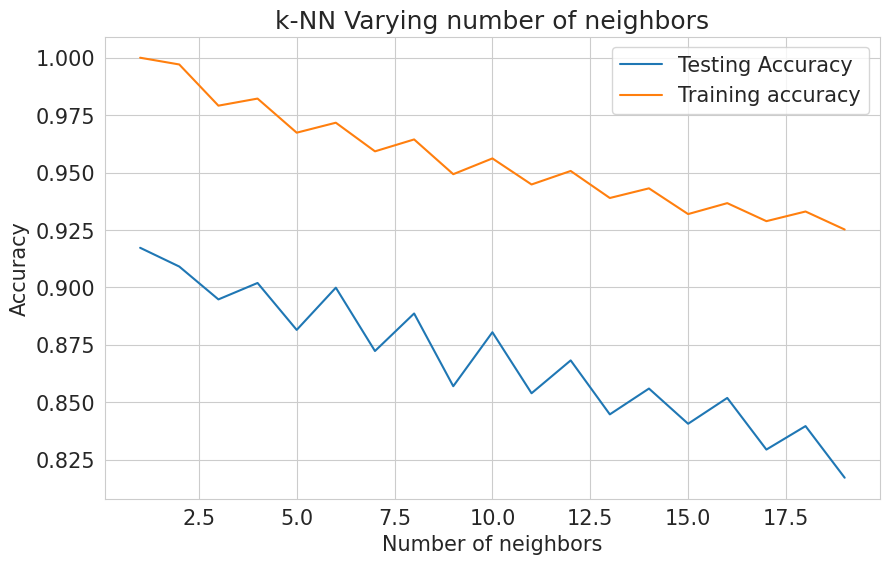

In [465]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [466]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=1)
#Fit the model
model_knn = knn.fit(x_train,y_train)
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
y_test_knn = model_knn.predict(x_test)
from sklearn import metrics 
print(metrics.classification_report(y_test,y_test_knn))

print("Test Accuracy:", metrics.accuracy_score(y_test,y_test_knn))
print("Test Recall:", metrics.recall_score(y_test,y_test_knn))
print("Test f1_score:", metrics.f1_score(y_test,y_test_knn))
print("Test precision:", metrics.precision_score(y_test,y_test_knn))


#import confusion_matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_test_knn)


              precision    recall  f1-score   support

           0       0.97      0.94      0.95       892
           1       0.53      0.68      0.59        87

    accuracy                           0.92       979
   macro avg       0.75      0.81      0.77       979
weighted avg       0.93      0.92      0.92       979

Test Accuracy: 0.9172625127681308
Test Recall: 0.6781609195402298
Test f1_score: 0.5929648241206029
Test precision: 0.5267857142857143


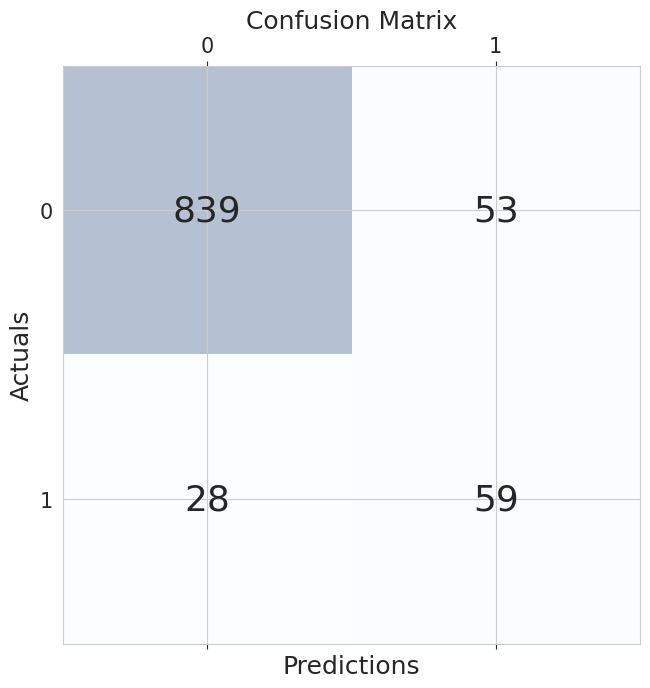

In [467]:
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## 6.6 Logistic Regression

In [468]:
from sklearn.linear_model import LogisticRegression 
params = {"C": np.linspace(0.5,2,20)}
grid = GridSearchCV(LogisticRegression(random_state = random_state, solver = 'liblinear'), params, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)
print(f"Best HyperParameters: {grid.best_params_}")
print(f"Best Accuracy: {grid.best_score_}")

Best HyperParameters: {'C': 0.7368421052631579}
Best Accuracy: 0.9095238095238095


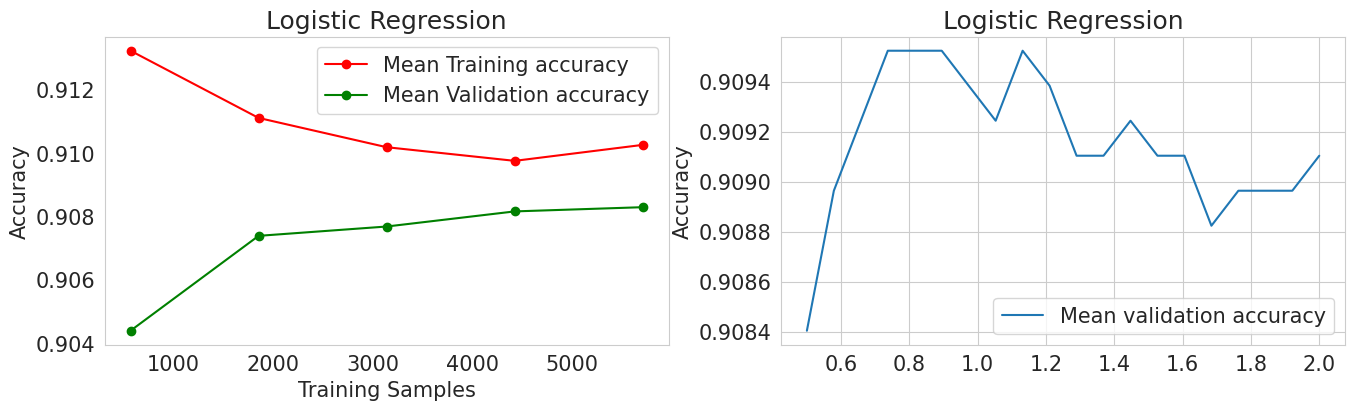

In [469]:
fig,axes=plt.subplots(1,2,figsize=(16,4))
train_sizes,train_scores,test_scores,fit_times,_=learning_curve( LogisticRegression(random_state = random_state, solver='liblinear'),
                                                                x_train,y_train,return_times=True,
                                                                cv=ShuffleSplit(n_splits=100,test_size=0.2,random_state=random_state) )

train_scores_mean=np.mean(train_scores,axis=1)
test_scores_mean=np.mean(test_scores,axis=1)
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Training Samples")
axes[0].set_ylabel("Accuracy")
axes[0].plot(train_sizes,train_scores_mean,'o-',color='r',label="Mean Training accuracy")
axes[0].plot(train_sizes,test_scores_mean,'o-',color='g',label="Mean Validation accuracy")
axes[0].legend(loc='best')
axes[0].grid()

temp = pd.DataFrame(grid.cv_results_)
cv_results = temp.pivot_table(values='mean_test_score',index=temp.columns[4])
axes[1].set_title("Logistic Regression")
axes[1].set_ylabel("Accuracy")
#cv_results.plot(ax=axes[1],marker='o',label="Mean validation accuracy")
axes[1].plot(cv_results,label="Mean validation accuracy")
axes[1].legend(loc='best')

*Variance* decreases as training samples increase, so to best generalize unseen data the final model will be fitted with all the training samples and the inverse regulation parameter C set to 1.0526315789473684

In [470]:
final_model = grid.best_estimator_
final_model.fit(x_train, y_train)
pred_label=final_model.predict(x_test) 
pred_proba=final_model.predict_proba(x_test)[:,1] 
print(metrics.classification_report(y_test,pred_label))
print("AUC: ", round(roc_auc_score(y_test, pred_proba),4))


print("Test Accuracy:", metrics.accuracy_score(y_test,pred_label))
print("Test Recall:", metrics.recall_score(y_test,pred_label))
print("Test f1_score:", metrics.f1_score(y_test,pred_label))
print("Test precision:", metrics.precision_score(y_test,pred_label))



              precision    recall  f1-score   support

           0       0.99      0.88      0.93       892
           1       0.42      0.91      0.58        87

    accuracy                           0.88       979
   macro avg       0.71      0.89      0.76       979
weighted avg       0.94      0.88      0.90       979

AUC:  0.964
Test Accuracy: 0.8825331971399387
Test Recall: 0.9080459770114943
Test f1_score: 0.5787545787545788
Test precision: 0.42473118279569894
